In [1]:
# ClearML - Example of integrating plots and training on jupyter notebook. 
# In this example, simple graphs are shown, then an MNIST classifier is trained using Keras.
import os
import tempfile

from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Connecting ClearML
from clearml import Task
task = Task.init(project_name = 'examples', task_name = 'notebook example')


ClearML Task: created new task id=2f9f2f08fa90427aa51e34b839e49fb6
ClearML results page: https://demoapp.clearml.allegro.ai/projects/0e152d03acf94ae4bb1f3787e293a9f5/experiments/2f9f2f08fa90427aa51e34b839e49fb6/output/log


In [3]:
# Set script parameters
task_params = {'num_scatter_samples': 60, 'sin_max_value': 20, 'sin_steps': 30}
task_params = task.connect(task_params)


Simple plots. You can view the plots in experiments results page  

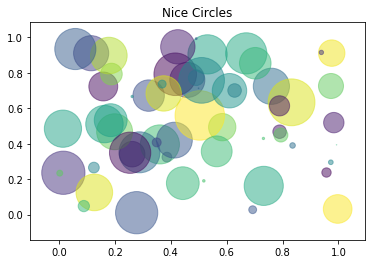

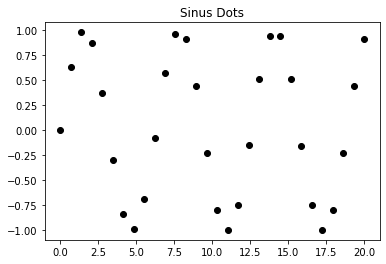

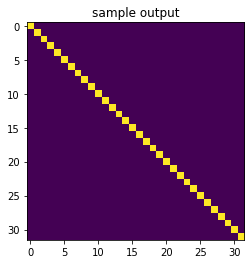

In [4]:
%matplotlib inline
N = task_params['num_scatter_samples']
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Nice Circles')
plt.show()

x = np.linspace(0, task_params['sin_max_value'], task_params['sin_steps'])
y = np.sin(x)
plt.plot(x, y, 'o', color='black')
plt.title('Sinus Dots')
plt.show()

m = np.eye(32, 32, dtype=np.uint8)
plt.imshow(m)
plt.title('sample output')
plt.show()

Keras training example


In [5]:
# Notice, Updating task_params is traced and updated in ClearML
task_params['batch_size'] = 128
task_params['nb_classes'] = 10
task_params['nb_epoch'] = 6
task_params['hidden_dim'] = 512
batch_size = task_params['batch_size']
nb_classes = task_params['nb_classes']
nb_epoch = task_params['nb_epoch']


In [6]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

hidden_dim = task_params['hidden_dim']
model = Sequential()
model.add(Dense(hidden_dim, input_shape=(784,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(hidden_dim))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

board = TensorBoard(histogram_freq=1, log_dir=os.path.join(tempfile.gettempdir(), 'histogram_example'))
model_store = ModelCheckpoint(filepath=os.path.join(tempfile.gettempdir(), 'weight.{epoch}.hdf5'))

model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[board, model_store],
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
___________

W0615 20:51:48.301550 139739992581888 ag_logging.py:146] Entity <function Function._initialize_uninitialized_variables.<locals>.initialize_variables at 0x7f174c2f7a60> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: module 'gast' has no attribute 'Num'


Epoch 1/6
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2210 - accuracy: 0.9313 - val_loss: 0.1319 - val_accuracy: 0.9581
Epoch 2/6
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0814 - accuracy: 0.9756 - val_loss: 0.0814 - val_accuracy: 0.9773
Epoch 3/6
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0719 - val_accuracy: 0.9789
Epoch 4/6
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0879 - val_accuracy: 0.9769
Epoch 5/6
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0713 - val_accuracy: 0.9812
Epoch 6/6
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.0900 - val_accuracy: 0.9804
Test score: 0.09002585870867187
Test accuracy: 0.9804
